# `SYRACUSE UNIVERSITY`
# MEMO

__To:__ Deborah V. Landowski, PhD

__From:__  Dan Tully

__Date:__ 12/11/22

__Re:__  IST 652 Final Project
***

### __Introduction__
This assignment is to acquire, access, and transform data from structured and semi-structured data sources.  I will use pandas, numpy, and pandasql for the data wrangling.  Finally, I will use matplotlib and seaborn to help visualize the data. Throughout this report, I will look at the data dictionary to help explain the data, the data types, and will also identify any areas of the data that might require cleaning.  Once the data is normalized, I will begin to explore some questions regarding the Pokémon collections.  I will conclude with some observations about the Pokémon collections in this dataset.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import warnings
warnings.filterwarnings('ignore', message='.*')
from IPython.display import display_html 

import seaborn as sns # Import seaborn
sns.set_theme() # Apply the default theme

### __About the Data__
This dataset pokemon was obtained from: https://www.kaggle.com/datasets/terminus7/pokemon-challenge/versions/1.  I also found some data on https://pokemondb.net/tools/text-list.  This site provides Pokémon attributes from various generation collections.   I downloaded the generations one at a time so I have six files to input (generations 1 through 6).  After I added a new column identifying the generation, I appended the six files to one (pkmn) dataset.  I did this so that I would be able to do analysis by generation as well as the other attributes. 


In [2]:
print('Read in two datasets: \n(1) pkmn (pokemondb) dataset \n(2) pokemon (kaggle) dataset:\n')
# read in the csv file and assign to pandas Dataframe for analysis
pokemon = pd.read_csv('./Final_Project/pokemon.csv')

# read in the CSV files and assign it to a pandas DataFrame for analysis
gen1 = pd.read_csv('./Final_Project/gen1.csv')       # read file
gen1['gen'] = '1'                                    # add column to identify generation
gen2 = pd.read_csv('./Final_Project/gen2.csv')       # read file
gen2['gen'] = '2'                                    # add column to identify generation
gen3 = pd.read_csv('./Final_Project/gen3.csv')       # read file
gen3['gen'] = '3'                                    # add column to identify generation
gen4 = pd.read_csv('./Final_Project/gen4.csv')       # read file
gen4['gen'] = '4'                                    # add column to identify generation
gen5 = pd.read_csv('./Final_Project/gen5.csv')       # read file
gen5['gen'] = '5'                                    # add column to identify generation
gen6 = pd.read_csv('./Final_Project/gen6.csv')       # read file
gen6['gen'] = '6'                                    # add column to identify generation

pkmn = gen1.append([gen2, gen3, gen4, gen5, gen6])   # append all six generations to pkmn variable
print('First two records of the pkmn_pokemondb dataset:')
display(pkmn.head(2))                                # display first two records of pkmn
print('First two records of the pokemon_kaggle dataset:')
display(pokemon.head(2))                             # display first two records of pokemon

Read in two datasets: 
(1) pkmn (pokemondb) dataset 
(2) pokemon (kaggle) dataset:

First two records of the pkmn_pokemondb dataset:


,Number,Name,Form,Type 1,Type 2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen
0,1,Bulbasaur,NaN,Grass,Poison,45,49,49,65,65,45,1
1,2,Ivysaur,NaN,Grass,Poison,60,62,63,80,80,60,1


First two records of the pokemon_kaggle dataset:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


#### Pokémon Column Data Definition
The data in both data sets are described as:

* __Number (#)__: ID for each Pokémon
* __Name__: Name of each Pokémon
* __Type 1__: Each Pokémon has a type, this determines weakness/resistance to attacks
* __Type 2__: Some Pokémon are dual type
* __HP__: hit points, or health, defines how much damage a Pokémon can withstand before fainting
* __Attack__: the base modifier for normal attacks
* __Defense__: the base damage resistance against normal attacks
* __Sp.Attack (SP. Atk)__: special attack, the base modifier for special attacks
* __Sp.Defense (SP. Def)__: the base damage resistance against special attacks
* __Speed__: determines which Pokémon attacks first each round
* __gen (Generation)__: determines which generation the Pokémon belongs

### __Exploration and Cleaning__
I am going to explore the data types and see if there is any data cleaning necessary. We are going to review the data types, drop any columns that we do not need for our analysis, and check the columns for NULL (blanks).  I did find and use some code from https://www.kaggle.com/code/mmetter/pokemon-data-analysis-tutorial/ to help with the data cleaning and analysis.  


In [3]:
# Examine the column headings between the two data sources
print('Examine the column headings between the two data sources')
print('columns in the pkmn_pokemondb data set', pkmn.columns)
print('columns in the pokemon_kaggle data set', pokemon.columns)

Examine the column headings between the two data sources
columns in the pkmn_pokemondb data set Index(['Number', 'Name', 'Form', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp.Attack', 'Sp.Defense', 'Speed', 'gen'],
      dtype='object')
columns in the pokemon_kaggle data set Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [4]:
print('This is the (rows, columns) of the pkmn dataset:',pkmn.shape)
print('This is the (rows, columns) of the pokemon dataset:',pokemon.shape)

# pivoting
print('Pivoting these data sets side-by-side we clearly see the quantities do not match.')
a = pd.pivot_table(pokemon, values='Name', index='Generation', aggfunc='count')
b = pd.pivot_table(pkmn, values='Name', index='gen', aggfunc='count')  

# code to display the tables side by side for comparison
df1_styler = a.style.set_table_attributes("style='display:inline'").set_caption('pokemon_kaggle')
df2_styler = b.style.set_table_attributes("style='display:inline'").set_caption('pkmn_pokemondb')

space = "\xa0" * 10
display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)


This is the (rows, columns) of the pkmn dataset: (1845, 12)
This is the (rows, columns) of the pokemon dataset: (800, 12)
Pivoting these data sets side-by-side we clearly see the quantities do not match.


,Name
Generation,
1,165
2,106
3,160
4,121
5,165
6,82
,Name
gen,
1,1190


In [5]:
pokemon.drop('Legendary', inplace=True, axis=1)           # Drop Legendary column from pokemon data
pkmn.drop('Form', inplace=True, axis=1)                   # Drop Form column from pkmn data
print('I dropped Legendary from the pokemon dataset and Form from the pkmn dataset. \nI will not need them for this analysis.')
    

I dropped Legendary from the pokemon dataset and Form from the pkmn dataset. 
I will not need them for this analysis.


In [6]:
# updated attribute type to match attributes
print('Updated the pokemon column names to match the pkmn dataset to make cross evaluation easier.')
# rename columns
pokemon.rename(columns={"#": "Number","Type 1":"Type1", "Type 2":"Type2","Sp. Atk":"Sp.Attack","Sp. Def":"Sp.Defense","Generation":"gen"}, inplace=True)
pkmn.rename(columns={"Type 1":"Type1", "Type 2":"Type2"}, inplace=True)

print('Updated some data types from both datasets, again so they match, which makes cross evaluation easier.')
# change data types
pokemon['gen'] = pokemon['gen'].astype('str')
pokemon['Number'] = pokemon['Number'].astype('str')
pkmn['Number'] = pkmn['Number'].astype('str')

print('Data types for pokemon:')
pokemon.info()                    # displays how many columns, names, if null records exist and data types
print('\n')
print('Data types for pkmn:')
pkmn.info()                       # # displays how many columns, names, if null records exist and data types


Updated the pokemon column names to match the pkmn dataset to make cross evaluation easier.
Updated some data types from both datasets, again so they match, which makes cross evaluation easier.
Data types for pokemon:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      800 non-null    object
 1   Name        799 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp.Attack   800 non-null    int64 
 8   Sp.Defense  800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  gen         800 non-null    object
dtypes: int64(6), object(5)
memory usage: 68.9+ KB


Data types for pkmn:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 130
Data colum

In [7]:
print('Looking at the data sets side by side, showing which field have nulls and how many nulls are in that column.')
# count how many null records are in each data set
a = pd.DataFrame(pokemon.isnull().sum())
b = pd.DataFrame(pkmn.isnull().sum())
# code to display the tables side by side for comparison
df1_styler = a.style.set_table_attributes("style='display:inline'").set_caption('pokemon_kaggle')
df2_styler = b.style.set_table_attributes("style='display:inline'").set_caption('pkmn_pokemondb')
#df2_t_styler = b.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)
print('The pokemon_kaggle set is missing a Name and some Type 2 attribute items. \nI am going to use the pkmn file for most of my analysis since it appears to have complete data. \nEven though I will not be using that pokemon data set, I will still find the missing Pokémon name.')



Looking at the data sets side by side, showing which field have nulls and how many nulls are in that column.


,0
Number,0
Name,1
Type1,0
Type2,386
HP,0
Attack,0
Defense,0
Sp.Attack,0
Sp.Defense,0
Speed,0


The pokemon_kaggle set is missing a Name and some Type 2 attribute items. 
I am going to use the pkmn file for most of my analysis since it appears to have complete data. 
Even though I will not be using that pokemon data set, I will still find the missing Pokémon name.


In [8]:
# look up from pkmn dataset missing Pokémon name from pokemon 
print('This is the Pokémon from the pokemon dataset that is missing a name, #63, from Generation 1')
pokemon[pokemon['Name'].isnull()]


This is the Pokémon from the pokemon dataset that is missing a name, #63, from Generation 1


,Number,Name,Type1,Type2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1


In [9]:
print('I discovered that the numbers assigned from each of the datasets are different so I searched pkmn in order to find the missing name.  To find the correct one I had to look at the one that came before and the one that came after in the raw data.')
pkmn[pkmn['Number']=='57']

I discovered that the numbers assigned from each of the datasets are different so I searched pkmn in order to find the missing name.  To find the correct one I had to look at the one that came before and the one that came after in the raw data.


,Number,Name,Type1,Type2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen
75,57,Primeape,Fighting,NaN,65,105,60,60,70,95,1


In [10]:
print('Assigned the correct Pokémon name from pokemon dataset that was missing.')
pokemon['Name'][62] = 'Primeape'       # Assigned value to the Name field
pokemon[pokemon['Number']=='63']       # Returned the value to see the update

Assigned the correct Pokémon name from pokemon dataset that was missing.


,Number,Name,Type1,Type2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1


In [11]:
print('Below are the descriptive statistics for the remaining columns in the pkmn dataset: \n')
pkmn.describe()

Below are the descriptive statistics for the remaining columns in the pkmn dataset: 



,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,70.729539,80.740379,74.777778,73.230894,72.459621,69.144173
std,26.091405,32.611636,31.090614,32.931465,27.886218,29.973250
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,52.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,70.000000,78.000000,70.000000,65.000000,70.000000,65.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [12]:
print('Using Pandas pivot table with counts I was able to find which generations have which type 1 & 2 attributes in the pkmn dataset.')
pd.pivot_table(pkmn ,values='Number',index='Type1',columns='gen',
               aggfunc='count').sort_values(by=['Type1'],ascending=True)

a = pd.pivot_table(pkmn ,values='Number',index='Type1',columns='gen',
               aggfunc='count').sort_values(by=['Type1'],ascending=True).fillna(0).astype(int)
b = pd.pivot_table(pkmn ,values='Number',index='Type2',columns='gen',
               aggfunc='count').sort_values(by=['Type2'],ascending=True).fillna(0).astype(int)
# code to display the tables side by side for comparison
df1_styler = a.style.set_table_attributes("style='display:inline'").set_caption('Type 1')
df2_styler = b.style.set_table_attributes("style='display:inline'").set_caption('Type 2')
#df2_t_styler = b.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10
display_html(df1_styler._repr_html_()+ space + df2_styler._repr_html_(), raw=True)

Using Pandas pivot table with counts I was able to find which generations have which type 1 & 2 attributes in the pkmn dataset.


gen,1,2,3,4,5,6
Type1,,,,,,
Bug,91,10,12,12,18,7
Dark,56,5,4,3,13,6
Dragon,47,0,7,3,9,10
Electric,73,6,4,12,8,5
Fairy,31,5,0,1,0,9
Fighting,49,2,4,2,7,5
Fire,75,8,7,5,9,12
Flying,10,0,0,0,2,2
Ghost,47,1,4,7,5,12


In [13]:
# This shows just how off the two data sets are

print('Using merge with the indicator turned on we can see only about 40% of the Pokémon data overlaps between each dataset on Name and Generation.  This is why I will only use the pkmn_pokemondb dataset for most of this analysis.')
rslt = pd.merge(pokemon, pkmn, how="outer", on=["Name", "gen"],indicator=True)
#rslt.head()
gb = rslt.groupby('_merge').count()
gb['Name']
                

Using merge with the indicator turned on we can see only about 40% of the Pokémon data overlaps between each dataset on Name and Generation.  This is why I will only use the pkmn_pokemondb dataset for most of this analysis.


_merge
left_only       95
right_only    1073
both           772
Name: Name, dtype: int64

### __Questions__
This section identifies the three questions that I seek to answer using the pkmn dataset and twitter data.  The first question, I summarizes type information as well as show the correlation of the attributes that make up the total to see which have the greatest impact.  In the second question, I will explore the data by generations. In the third question, I will explore twitter text message to obtain a sentiment and determine what is trending. By exploring these questions, I hope to identify a greater understanding of the Pokémon.

#### __Question 1__
Which type has the best and worst total scoring while exploring the numeric attributes that have the greatest impact on that total? Using the pkmn dataset, I will explore some descriptive statistics and correlation.  

In [14]:
print('Adding a total score to the dataset by adding up the HP through Speed attributes. \n(total = HP + Attack + Defense + Sp.Attack + Sp.Defense + Speed)')
pkmn['total'] = pkmn.sum(axis=1)     # sum pkmn by row and assign total


Adding a total score to the dataset by adding up the HP through Speed attributes. 
(total = HP + Attack + Defense + Sp.Attack + Sp.Defense + Speed)


In [15]:
print('Display the first five records showing the new total attribute column.')
pkmn.head()

Display the first five records showing the new total attribute column.


,Number,Name,Type1,Type2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen,total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525
3,3,Venusaur,Grass,Poison,80,100,123,122,120,80,1,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309


In [16]:
print('In these results we can see the Psychic type shows up the most.')
print('Below are the best Avg.total by the type of Pokémon:')
q = """SELECT DISTINCT Type1||'~'||Type2[type]
            , round(avg(HP),1)[Avg.HP]
            , round(avg(Attack),1)[Avg.Attack] 
            , round(avg(Defense),1)[Avg.Defense]
            , round(avg(Speed),1)[Avg.Speed]
            , round(avg(total),1)[Avg.total]
       FROM pkmn 
       GROUP BY type
       ORDER BY [Avg.total] desc;"""
rdf = pysqldf(q)
rdf.head()


In these results we can see the Psychic type shows up the most.
Below are the best Avg.total by the type of Pokémon:


,type,Avg.HP,Avg.Attack,Avg.Defense,Avg.Speed,Avg.total
0,Ground~Fire,100.0,180.0,160.0,90.0,770.0
1,Psychic~Dragon,97.0,167.0,97.0,129.0,754.0
2,Psychic~Steel,117.0,147.0,117.0,87.0,680.0
3,Psychic~Ice,100.0,165.0,150.0,50.0,680.0
4,Psychic~Dark,80.0,160.0,60.0,80.0,680.0


In [17]:
print('In these results we can see the Bug type shows up the most.')
print('Below are the worst Avg.total by the type of Pokémon:')
q = """SELECT DISTINCT Type1||'~'||Type2[type]
            , round(avg(HP),1)[Avg.HP]
            , round(avg(Attack),1)[Avg.Attack] 
            , round(avg(Defense),1)[Avg.Defense]
            , round(avg(Speed),1)[Avg.Speed]
            , round(avg(total),1)[Avg.total]
       FROM pkmn 
       GROUP BY type
       ORDER BY [Avg.total] asc;"""
rdf = pysqldf(q)
rdf.head()

In these results we can see the Bug type shows up the most.
Below are the worst Avg.total by the type of Pokémon:


,type,Avg.HP,Avg.Attack,Avg.Defense,Avg.Speed,Avg.total
0,Bug~Ghost,1.0,90.0,45.0,40.0,236.0
1,Normal~Fairy,92.6,41.9,53.4,29.4,324.4
2,Bug~Water,45.0,55.0,61.0,62.5,324.5
3,Ice~Bug,50.0,45.0,47.5,42.5,330.0
4,Poison~Bug,40.0,50.0,90.0,65.0,330.0


In [18]:
print('Correlation matrix ')
print('Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.')
cm = sns.light_palette("blue", as_cmap=True)
col = ['type','Avg.HP', 'Avg.Attack', 'Avg.Defense', 'Avg.Speed', 'Avg.total']
a = rdf.loc[:,col].corr()
a.style.background_gradient(cmap = cm)

Correlation matrix 
Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.


,Avg.HP,Avg.Attack,Avg.Defense,Avg.Speed,Avg.total
Avg.HP,1.000000,0.495031,0.303739,0.111414,0.630868
Avg.Attack,0.495031,1.000000,0.421847,0.262814,0.707975
Avg.Defense,0.303739,0.421847,1.000000,-0.239432,0.527983
Avg.Speed,0.111414,0.262814,-0.239432,1.000000,0.440783
Avg.total,0.630868,0.707975,0.527983,0.440783,1.000000


Correlation matrix heatmap
Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.


[Text(0, 0.5, 'Avg.HP'),
 Text(0, 1.5, 'Avg.Attack'),
 Text(0, 2.5, 'Avg.Defense'),
 Text(0, 3.5, 'Avg.Speed'),
 Text(0, 4.5, 'Avg.total')]

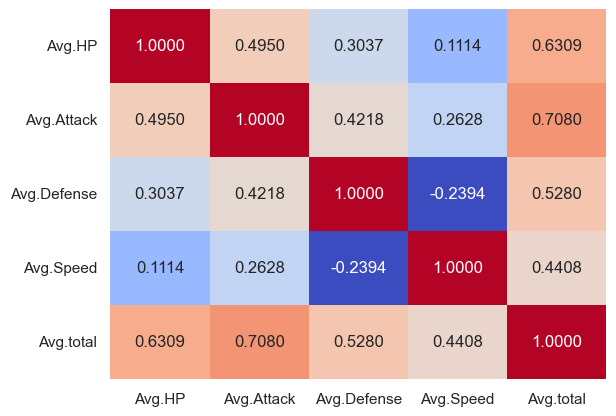

In [19]:
import os
print('Correlation matrix heatmap')
print('Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.')
fig, ax = plt.subplots()
sns.heatmap(rdf.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
#plt.savefig(os.environ['USERPROFILE']+'/Downloads/Tully_Dan_Final_corr_rslt.png', bbox_inches='tight', pad_inches=0.0)

Pokémon Feature Correlation Plot
Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.


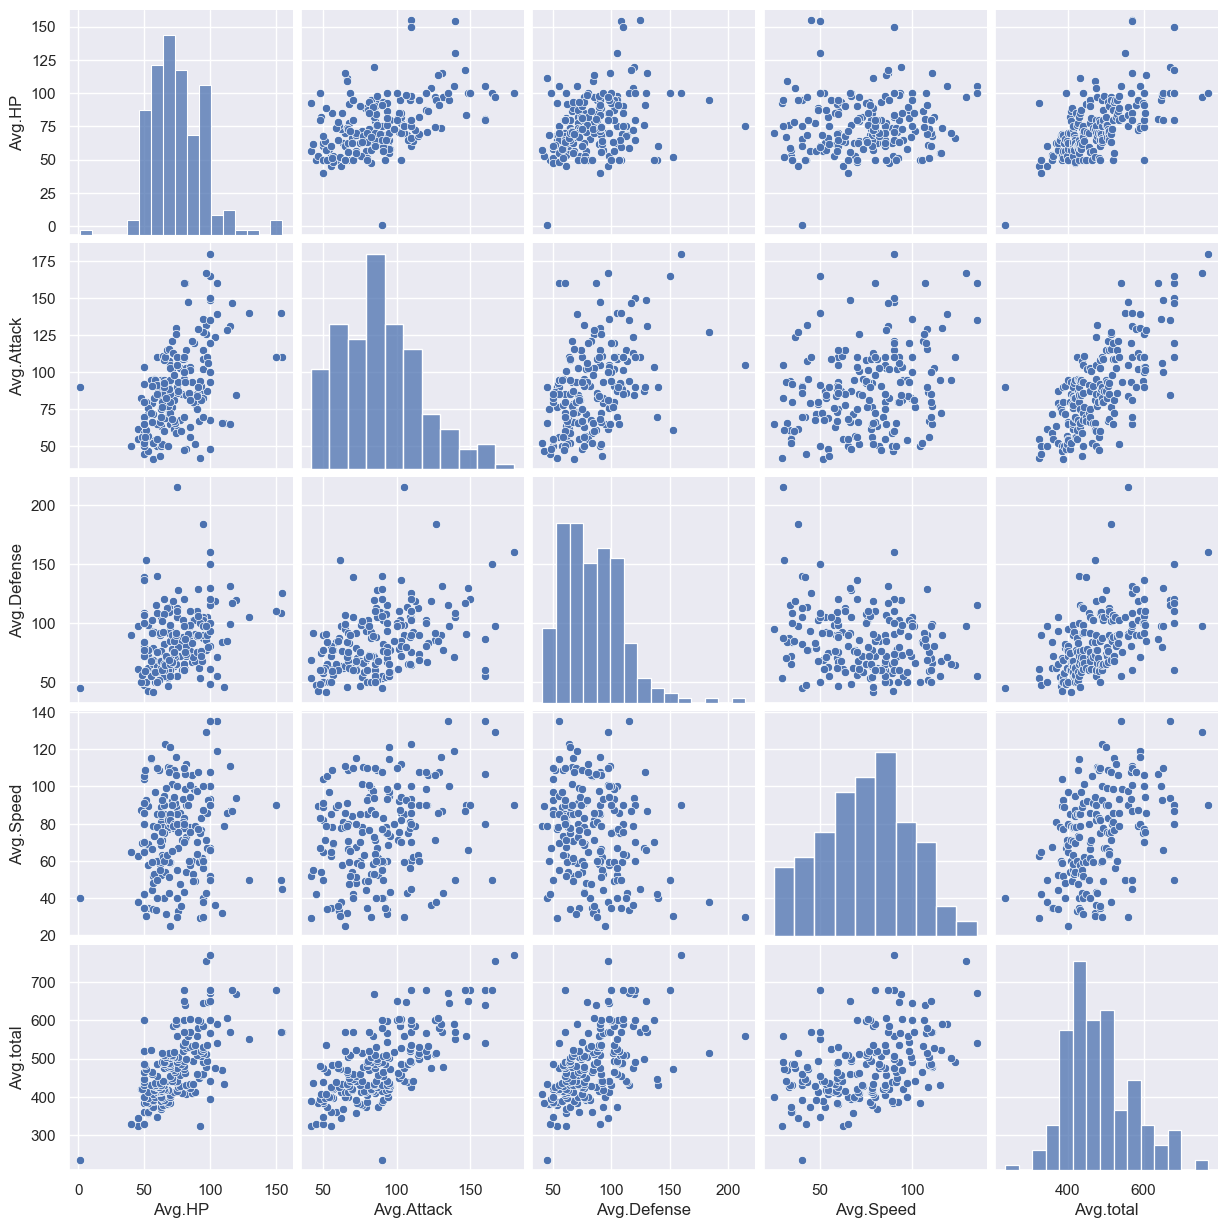

In [20]:
print('Pokémon Feature Correlation Plot')
print('Below is showing which attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.')
col = ['type','Avg.HP', 'Avg.Attack', 'Avg.Defense', 'Avg.Speed', 'Avg.total']
sns.pairplot(rdf.loc[:,col].dropna())

Pokémon Boxplot Grouped by Type
Below is showing overall that bug type mean is the worst but Dragon (not Psychic) has the best total mean.


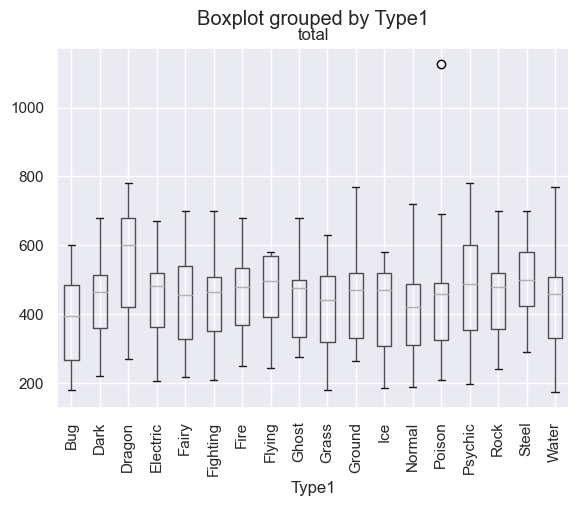

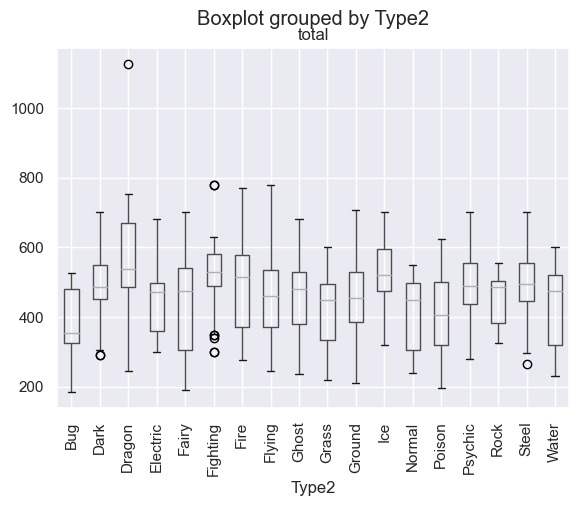

In [21]:
print('Pokémon Boxplot Grouped by Type')
print('Below is showing overall that bug type mean is the worst but Dragon (not Psychic) has the best total mean.')
# a boxplot chart for visualization
a = pkmn.boxplot(by ='Type1', column =['total'], grid = True)
a.tick_params(axis='x', labelrotation=90)

a = pkmn.boxplot(by ='Type2', column =['total'], grid = True)
a.tick_params(axis='x', labelrotation=90)

##### __Q1 Description of the Program__
I utilized python pandas, pandasql, ipython.display, and seaborn packages for the data wrangling and to help visualize the data. The python pandas programming is efficient for manipulating and analyzing data. First I summed the attributes to get a total column added.  Then using SQL I was able to combine Types and average the base stat attributes.  Created a correlation matrix to show the strength of any statistical relationships between attributes. Also used a seaborn heatmap to further emphasis the correlation matrix.  Used seaborn to scatter plot those relationships. Concluded, using box plots to visualize the mean and the quartiles of the total for each type of Pokémon. These python tools demonstrates the flexibility in comparing, reshaping, and pivoting of a structured datasets.

##### __Q1 Description of the Output and Analysis__
In this analysis we concluded that the attributes Avg.HP and Avg.Attack have the greatest relationship with Avg.total.  We also noted that overall the bug type mean has the worst average total points, but Dragon (not Psychic) has the best mean.  The best type being Dragon (on average) over Psychic was surprising since Psychic type showed up the most at the top of the list. Just goes to show you, you can't judge a book by its cover.   

#### __Question 2__
Do Pokemon have better scoring over time? Explore the data by generation.

In [22]:
print('Sorted the data set descending by total and as we can see there are Generations 1, 6, and 4 identified at the top of the list.')
print("NOTE: The top one appeared to be another potential outlier (total_stat == 1125), but I looked it up on a Pokémon site and it appears to be correct. Site: https://pokemondb.net/pokedex/eternatus")
highTotalStat = pkmn.sort_values('total',ascending=False)
highTotalStat.head(15)

Sorted the data set descending by total and as we can see there are Generations 1, 6, and 4 identified at the top of the list.
NOTE: The top one appeared to be another potential outlier (total_stat == 1125), but I looked it up on a Pokémon site and it appears to be correct. Site: https://pokemondb.net/pokedex/eternatus


,Number,Name,Type1,Type2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,gen,total
1058,890,Eternatus,Poison,Dragon,255,115,250,125,250,130,1,1125
14,150,Mewtwo,Psychic,NaN,106,150,70,194,120,140,6,780
13,150,Mewtwo,Psychic,Fighting,106,190,100,154,100,130,6,780
475,384,Rayquaza,Dragon,Flying,105,180,100,180,100,115,1,780
42,384,Rayquaza,Dragon,Flying,105,180,100,180,100,115,6,780
201,150,Mewtwo,Psychic,Fighting,106,190,100,154,100,130,1,780
202,150,Mewtwo,Psychic,NaN,106,150,70,194,120,140,1,780
40,382,Kyogre,Water,NaN,100,150,90,180,160,90,6,770
473,383,Groudon,Ground,Fire,100,180,160,150,90,90,1,770
471,382,Kyogre,Water,NaN,100,150,90,180,160,90,1,770


In [23]:
print('Pivoted the data set by the average of total attribute and as we see Generation 6, 4, and 1 have the highest averages.')
dftable = pkmn.pivot_table(index=['gen'], values='total', aggfunc='mean', fill_value=0)
dftable

Pivoted the data set by the average of total attribute and as we see Generation 6, 4, and 1 have the highest averages.


,total
gen,
1,440.900000
2,407.180000
3,408.248227
4,447.898305
5,434.896970
6,505.610687


This Barplot graphically shows Generation 6, 4, and 1 have the highest averages.
AxesSubplot(0.125,0.11;0.775x0.77)


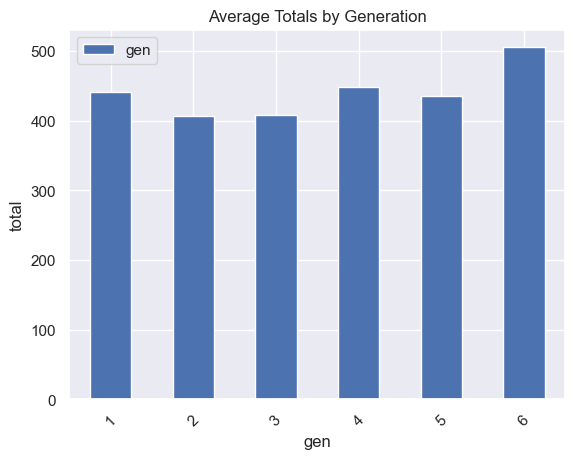

In [24]:
print('This Barplot graphically shows Generation 6, 4, and 1 have the highest averages.')
dplot = dftable.plot.bar(stacked=True)
leglabs = ['gen']
dplot.legend(leglabs)
dplot.set_ylabel('total')
dplot.set_title('Average Totals by Generation')
dplot.tick_params(axis='x', labelrotation=45)
print(dplot)

In [25]:
print('This pivot highlights the count and mean by type and generation.')
cm = sns.light_palette("green", as_cmap=True)
a = pkmn.pivot_table(index='Type1', columns='gen', values='total',
                aggfunc='count', fill_value=0).astype('int')
a.style.background_gradient(cmap = cm)
b = pkmn.pivot_table(index='Type1', columns='gen', values='total',
                aggfunc='mean', fill_value=0).astype('int')

# code to display the tables side by side for comparison
df1_styler = a.style.set_table_attributes("style='display:inline'").set_caption('count').background_gradient(cmap = cm)
#df1_styler = a.style.background_gradient(cmap = cm)
df2_styler = b.style.set_table_attributes("style='display:inline'").set_caption('mean').background_gradient(cmap = cm)
#df2_styler = b.style.background_gradient(cmap = cm)
#df2_t_styler = b.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10
display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_(), raw=True)

This pivot highlights the count and mean by type and generation.


gen,1,2,3,4,5,6
Type1,,,,,,
Bug,91,10,12,12,18,7
Dark,56,5,4,3,13,6
Dragon,47,0,7,3,9,10
Electric,73,6,4,12,8,5
Fairy,31,5,0,1,0,9
Fighting,49,2,4,2,7,5
Fire,75,8,7,5,9,12
Flying,10,0,0,0,2,2
Ghost,47,1,4,7,5,12


##### __Q2 Description of the Program__
I utilized python pandas, ipython.display, and seaborn packages for the data wrangling and to help visualize the data. The python pandas programming is efficient for manipulating and analyzing data. First using sort I was able to list the totals in descending order.  I then used the pivot table function to transform the dataset to generations while aggregating the mean. A standard barplot visualized the data trending clearly.  Finally, using pivot table and seaborn for visual effect I grouped, by type and generation, the count and mean. These python tools demonstrates the flexibility in comparing, reshaping, and pivoting of a structured datasets.

##### __Q2 Description of the Output and Analysis__
After reviewing the generational analysis I can conclude that the overall average totals slope larger as the generations progress from 1 through 6 as demonstrated by the Average Totals by Generation barplot above.  We also see that the counts are significantly lower as compared to the first generation which also reaffirms the later generations have to have higher individual averages to raise their total averages.  So, if you looking for a winning Pokémon for battles, it is probably better to acquire a newer generation Pokémon. 

#### __Question 3__
What is being discussed most on twitter about Pokémon?  Sentiment Analysis of the twitter text as well as trending hashtags.

In [2]:
# Import tweets
import snscrape.modules.twitter as sntwitter
import snscrape.modules

tweets_list=[]
query = '''(Pokemon AND Generation) until:2022-12-01 since:2001-05-05'''
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query=query).get_items()): # declare the query 
    if i>1000:                                                                     # number of tweets to scrape
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username]) # declare the attributes to be returned

#    print(tweet.content)
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'User'])
tweets_df


,Datetime,Tweet Id,Text,User
0,2022-11-30 23:58:54+00:00,1598104315549593600,Perhaps Pokemon's foray onto the Switch is a s...,Renegade_Fox
1,2022-11-30 23:47:31+00:00,1598101448877015040,@jdrider02 People that ask smash movie should ...,Chikle_TikalTak
2,2022-11-30 23:37:18+00:00,1598098876560351232,These were my champion teams for Pokémon Scarl...,iTyero
3,2022-11-30 23:28:58+00:00,1598096782856421376,there’s still so much of Pokémon metagame i do...,GammaMesarthim
4,2022-11-30 23:27:50+00:00,1598096494095400962,Tinkaton is the best Pokemon of the generation,ottdogbuns
...,...,...,...,...
996,2022-11-27 17:02:36+00:00,1596912386388082689,i will say i absolutely love the elite four me...,alterianrose
997,2022-11-27 16:55:05+00:00,1596910495550025729,"@ArloStuff @SateejTV Pokémon Glitch, Lagg and ...",RubenK91
998,2022-11-27 16:45:13+00:00,1596908012299395072,I have so many though my honorable mentions ar...,yogcavey
999,2022-11-27 16:44:55+00:00,1596907933144862721,"Every Pokemon generation got the dumb one, the...",ejeffers1239


In [3]:
print('Examining the first 5 tweets in the Sentiment Intensity Analyzer:\n')
# Sentiment Intensity Analyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
testtweets = tweets_df['Text'].head()                           # testing first 5 tweets in the analyzer 
sid = SentimentIntensityAnalyzer()
for tweet in testtweets:
    print(tweet)
    ss = sid.polarity_scores(tweet)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()


Examining the first 5 tweets in the Sentiment Intensity Analyzer:

Perhaps Pokemon's foray onto the Switch is a sign that it is time for Game Freak to re-evaluate and 'evolve' the generational formula. "Less is more", and perhaps Generation VIII and IX are prime examples of an extended timeframe being required for development.
compound: -0.4404, neg: 0.066, neu: 0.934, pos: 0.0, 
@jdrider02 People that ask smash movie should realize that the only thing that will sastify them is either a new subspace emissary or a animated series that works like those pokemon generations and whatever name they had
compound: 0.3612, neg: 0.0, neu: 0.932, pos: 0.068, 
These were my champion teams for Pokémon Scarlet &amp; Violet! I prefer my Violet team (right), but there are a ton of cool Pokémon in this generation so far. And this is before I even had any of the post-game mons. https://t.co/yQsWystt2j
compound: 0.69, neg: 0.0, neu: 0.867, pos: 0.133, 
there’s still so much of Pokémon metagame i don’t un

In [4]:
print('Examining the first 10 tweets through the TextBlob sentiment, calculating polarity and subjectivity:\n')
from textblob import TextBlob

text = ' '.join(tweets_df['Text'])            # sending tweet text to variable
blob = TextBlob(text)             
blob.tags
blob.noun_phrases
senti = []                                    # assign a new list
for sentence in blob.sentences:
    senti.append(sentence.sentiment)          # appending the Sentiments to the list
    

senti[:10]                                    # displaying the first 10

Examining the first 10 tweets through the TextBlob sentiment, calculating polarity and subjectivity:



[Sentiment(polarity=-0.4, subjectivity=0.4),
 Sentiment(polarity=0.16666666666666669, subjectivity=0.2833333333333333),
 Sentiment(polarity=0.08522727272727272, subjectivity=0.7272727272727273),
 Sentiment(polarity=0.24523809523809523, subjectivity=0.7285714285714286),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.19777462121212122, subjectivity=0.4401515151515151),
 Sentiment(polarity=-0.05, subjectivity=0.08333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0)]

In [12]:
#senti[:100]
pdsenti = pd.DataFrame(senti)
pdsenti.describe() 

,polarity,subjectivity
count,1229.000000,1229.000000
mean,0.109493,0.400053
std,0.281073,0.304220
min,-1.000000,0.000000
25%,0.000000,0.050000
50%,0.037500,0.418182
75%,0.250000,0.600000
max,1.000000,1.000000


In [29]:
print('Examining the overall tweets through the TextBlob sentiment, calculating polarity and subjectivity:\n')
def polarity_to_text(blob):
    if (blob.sentiment.polarity > 0.1):
        return 'Polarity is positive 😊'
    elif(blob.sentiment.polarity <= 0.1 and  blob.sentiment.polarity >= -0.1):
        return 'Polarity is neutral 😐'
    else:
        return 'Polarity is negative 😡' 

def subjecitivity_to_text(blob):
    if (blob.sentiment.subjectivity > 0.1):
        return 'Sentence is objective 👨‍🏫'
    elif(blob.sentiment.subjectivity <= 0.1 and  blob.sentiment.subjectivity >= -0.1):
        return 'Sentence is is neutral 😐'
    else:
        return 'Sentence is subjective 👀' 


from IPython.display import display, HTML
HTML(f'''<h3>{polarity_to_text(blob)}</br>
{subjecitivity_to_text(blob)}</h3>''')

Examining the overall tweets through the TextBlob sentiment, calculating polarity and subjectivity:



In [30]:
print('Examining the overall tweets extracting the hashtags.\n')
# gather all the hashtags in a text
ht = []
text1 = ' '.join(tweets_df['Text'])
textList = text1.split()
for i in textList:
    if(i.startswith("#")):
        x = i.replace("#", '')
        ht.append(x)



Examining the overall tweets extracting the hashtags.



In [31]:
dfht = pd.DataFrame(ht)
dfht.columns = ['hashtag']
print('The following are items are in this DataFrame:',dfht.count())
print('Below are the first 15 with their frequency count:\n')
dfht['hashtag'].value_counts().head(15)

The following are items are in this DataFrame: hashtag    300
dtype: int64
Below are the first 15 with their frequency count:



Pokemon                    36
PokemonScarletViolet       20
PokemonViolet              15
PokemonScarlet             14
pokemon                    11
NintendoSwitch              8
WonderTrade                 6
B2W2                        4
Unova                       4
PokemonTCG                  4
ShinyPokemon                4
ScarletViolet               4
PokemonScarletandviolet     4
PokemonGO                   4
PokemonCollectors           4
Name: hashtag, dtype: int64

Below is a WordCloud of all the extracted hashtags:


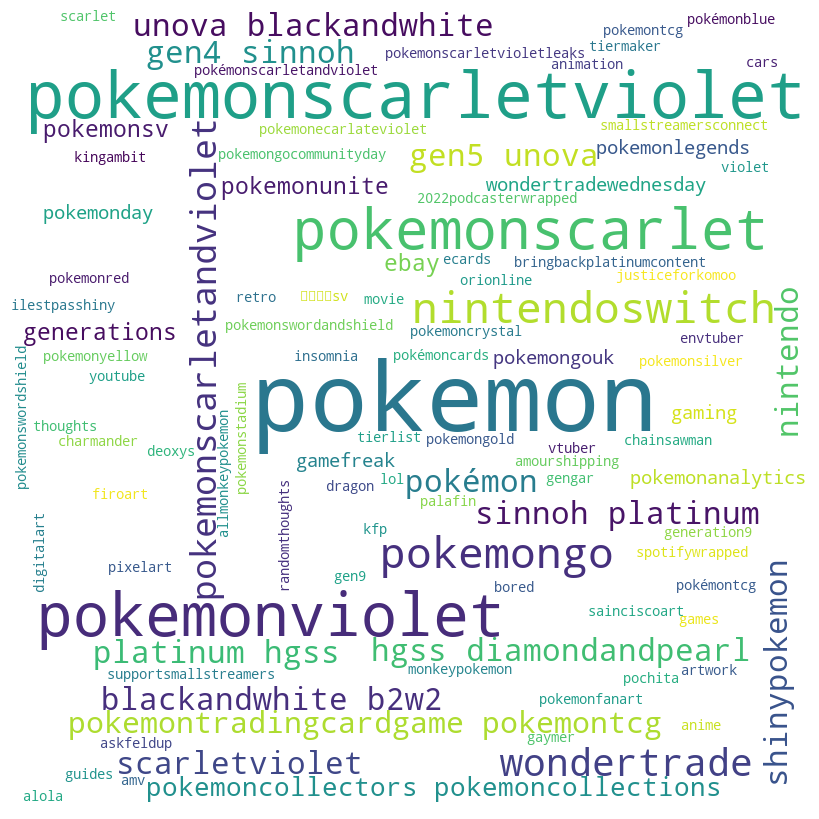

In [32]:
print('Below is a WordCloud of all the extracted hashtags:')
# Python program to generate WordCloud
# https://www.geeksforgeeks.org/generating-word-cloud-python/

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

# input my data into df
#df = tweets_df['Text']    
df = dfht['hashtag']

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the data
for val in df:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### __Q3 Description of the Program__
I utilized python pandas, snscrape, nltk, textblob, ipython.display, and wordcloud packages for the data wrangling and to help visualize the data. The python pandas programming is efficient for manipulating and analyzing data. First using snscrape, I was able to obtain 1000 tweets with around 6 lines of code. I then tested the text of the tweets through the sentiment analyzer nltk and textblob to determine that the overall text polarity is positive and the subjectivity is objective. We then used text splitting and count to obtain the hashtags values and frequencies allowing us to see what hashtag is most used. These python tools demonstrates the flexibility in comparing, reshaping, and pivoting of semi-structured datasets.

##### __Q3 Description of the Output and Analysis__
It was quite noticeable that one-third (5 out of 15) of these hashtags are talking about Scarlet and Violet.  That is most likely because of the recent release date.  What I was not sure about was why NintendoSwitch was so popular in the Pokémon twitter text? Then, I came across this article which explained it: 
"Pokémon Scarlet and Pokémon Violet is currently set to launch November 18, 2022... Pokémon Scarlet and Pokémon Violet will continue the series tradition of __being released exclusively on Nintendo’s latest hardware__, in this case, the Nintendo Switch. If you’re a Pokémon fan... you already have a Switch ready and waiting." (Source: https://www.digitaltrends.com/gaming/pokemon-scarlet-violet-release-date-trailer-gameplay-news/)  

### __Conclusion | Summary__
In this report I acquired, accessed, and transformed data from a structured data source. I used python pandas, pandasql, and numpy packages for the data wrangling. I used matplotlib and seaborn to help visualize the data. Throughout this report, I referenced the data dictionary to help explain the data, the data types to help analyze the data, and any areas of the data that might have required cleaning was cleaned. With the data normalized, I explored some questions to answer regarding Pokémon.  My main observation is that, I have a lot more to learn about Pokémon.  There is a lot of information about Pokémon and how they calculate battles is still somewhat of a mystery to me.  In this report, as noted above, the numbering of Pokémon should be standardized but the two original datasets I retrieved from different sources had different numbers assigned to the Pokémon or some of the Pokémon where missing.  This made comparisons more difficult, added confusion, and certainly brought doubt about the completeness and/or accuracy of the population overall.  The data set (pkmn) I compiled from pokemondb seemed to have more complete information.  By reviewing the total(stat) I can conclude that the type Dragon Pokémon in the later generation yield the higher average total(stat) making them terrific Pokémon all around.  The more I learn, the more I realize I do not know about Pokémon.  There is more analysis that can be done on Pokémon to include: rules comparison of the various games, cost analysis between generations, and of course what the consumers are saying on social media.  I hope this introduction to Pokémon was helpful and interesting.